# Game Theory

A simple game theoretic approach to reserve pricing, inspired by Jackson, Leyton-Brown & Shoham's *Game Theory Course,* Optimal Auctions. [Link.](http://www.cs.ubc.ca/~cs532l/gt2/slides/11-6.pdf)


## Imports and Constants

In [70]:
import utilities.engine as engine
import utilities.strategies as strategies
import utilities.tools as tools

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
%config InlineBackend.figure_format = 'retina'

In [40]:
TEST_FILE = 'raw-data/part-00127'

## Strategies 

### No Price Floor

109.47738216029029


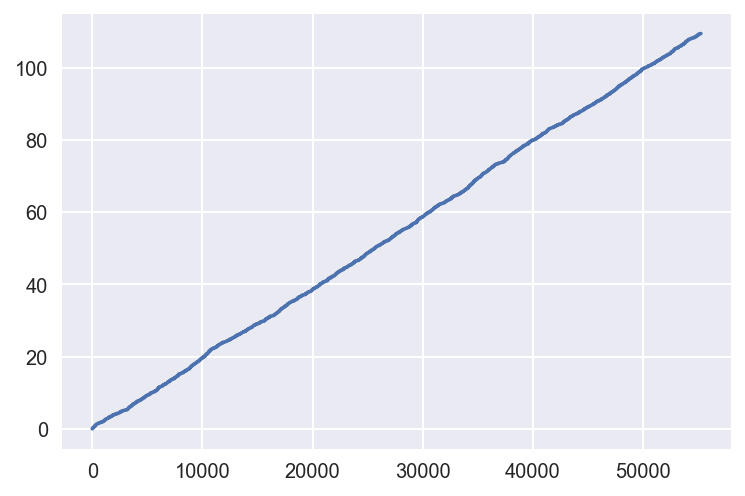

In [79]:
# Running simulation with no price flooe
test = strategies.Constant()
simulator = engine.Simulator(test)
with open(TEST_FILE) as file:
    data_stream = tools.curate_input(file)
    simulator.run_auction(data_stream)
baseline_profit = sum(simulator.revenues)
time = np.arange(simulator.steps)
total_money = np.cumsum(simulator.revenues)

print(baseline_profit)
plt.plot(time, total_money)
plt.show()

### Constant Price Floor

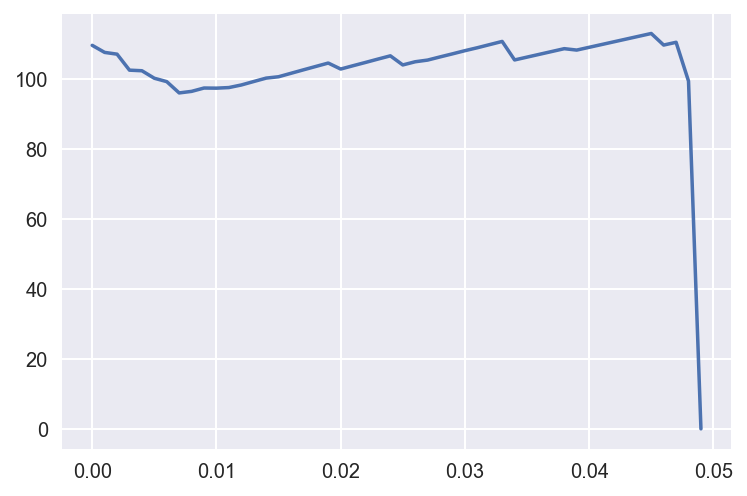

In [76]:
resulting_profit = []
price_floors = np.arange(0.0, 0.05, 0.001)
for floor in price_floors:
    test = strategies.Constant(floor)
    result = engine.Simulator.auto_file_run(test, TEST_FILE)
    profit = sum(result)
    resulting_profit.append(profit)
plt.plot(price_floors, resulting_profit)
plt.show()

In [77]:
maximum_index = np.argmax(resulting_profit)
maximum_profit = resulting_profit[maximum_index]
best_constant_floor = price_floors[maximum_index]
print(best_constant_floor, maximum_profit)

0.045 112.859235774


### Game Theoretic Approach

In [82]:
# Mean Approach
test = strategies.GameTheory(window_length=30, fraction=0.5)
result = engine.Simulator.auto_file_run(test, TEST_FILE)
sum(result)

103.7134967655789

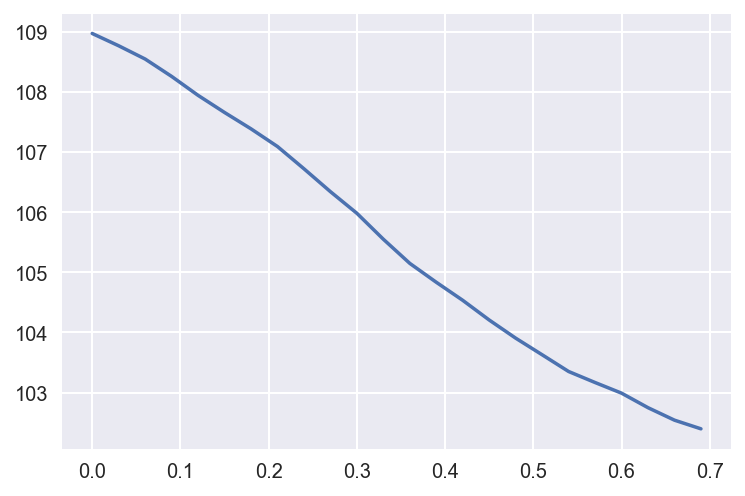

In [84]:
resulting_profit = []
fractions = np.arange(0.0, 0.72, 0.03)
for fraction in fractions:
    test = strategies.GameTheory(30, fraction)
    result = engine.Simulator.auto_file_run(test, TEST_FILE)
    profit = sum(result)
    resulting_profit.append(profit)
plt.plot(fractions, resulting_profit)
plt.show()

In [85]:
maximum_index = np.argmax(resulting_profit)
maximum_profit = resulting_profit[maximum_index]
best_fraction = price_floors[maximum_index]
print(best_fraction, maximum_profit)

0.0 108.978080145
